In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': True}
)

Success rate: 0.6415
Final Q-Table Values
LEFT DOWN RIGHT UP
[[5.93931301e-01 4.99284481e-03 3.09112688e-03 6.67736889e-03]
 [0.00000000e+00 2.09560074e-05 1.64929212e-03 6.10345146e-01]
 [1.21637194e-03 3.46138184e-03 1.40728452e-03 5.99881520e-01]
 [3.60635647e-03 3.52091791e-03 0.00000000e+00 4.38836776e-01]
 [7.35364426e-01 0.00000000e+00 2.55687459e-04 1.68534346e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.60897326e-04 2.86784767e-04 1.10625909e-01 2.37840976e-10]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.50273879e-04 8.57821982e-04 8.83884499e-01]
 [0.00000000e+00 8.80670736e-01 3.28974777e-04 0.00000000e+00]
 [7.32934651e-01 2.28454565e-05 1.49501430e-04 1.59759442e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.58519929e-01 0.00000000e+00]
 [0.00000000e+00 9.97933660e-01 0.00000000e+00 0.00000000

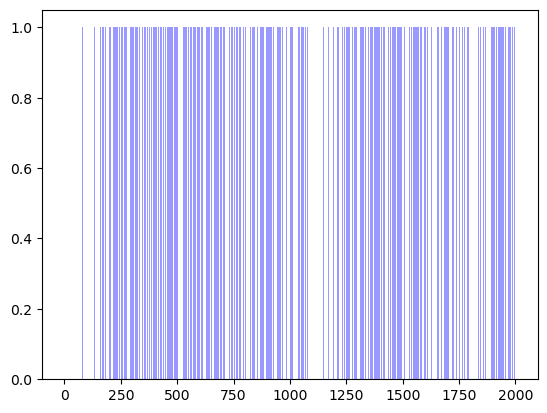

In [4]:
env = gym.make('FrozenLake-v3')
 
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
learning_rate = .85  
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()[0]
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))

        # Get new state and reward from environment
        new_state, reward, done, _, info = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = (1-learning_rate ) * Q[state, action] \
            + learning_rate *(reward + dis * np.max(Q[new_state, :]))

        rAll += reward
        state = new_state

    rList.append(rAll)
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()



